Your Uni : SC5570, YH3774, YZ4877
Your Full name : Haley Chen, Julia Hu, Yongjun Zhu

Link to your Public Github repository with Final report：https://github.com/edyy-Z/Project-of-advanced-machine-learning.git


## 1. Use Google Drive link to view a folder I shared with @columbia.edu google drive users
https://drive.google.com/drive/folders/18O-BnGOIw9ZiUwy17Uk_361xyfTF-qAN?usp=sharing
## 2. Right click folder and click "Add shortcut to Drive"
This will make sure the zipfile in this folder is accessible in your personal drive folder


In [ ]:
from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
# Step 2.1
Image(url= "https://github.com/user-attachments/assets/6515aa71-484b-4364-ac44-2331477720e8", width=600, height=300)

In [ ]:
# Step 2.2
Image(url= "https://github.com/user-attachments/assets/0d0d8f6c-a868-49c4-9e38-54f3006af39b", width=600, height=300)

## 3. Reference Code for Project 2

In [1]:
# Connect to google drive
import os
from google.colab import drive
#drive.mount('/content/drive/MyDrive')

# content in your drive is now available via "/content/drive/My Drive"

import os
from google.colab import drive

# Mount Google Drive to the specified directory
drive.mount('/content/drive')

# Check the contents of the drive to ensure it was successfully mounted
# os.listdir('/content/drive/My Drive')


Mounted at /content/drive


In [2]:
# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
  inflating: COVID-19_Rad

In [3]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


In [4]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-1132.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-725.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-69.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-951.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2863.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-694.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1982.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1821.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2759.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1172.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-664.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1880.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1630.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-835.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-187.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3

In [5]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1344]
fnames[1]=fnames[1][0:1344]
fnames[2]=fnames[2][0:1344]

In [6]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [7]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [8]:
len(image_filepaths)

4032

In [9]:
print(len(X) ) #same number of elements as filenames
print(X.shape ) #dimensions now 192,192,3 for all images
print(X.min().round() ) #min value of every image is zero
print(X.max() ) #max value of every image is one


4032
(4032, 192, 192, 3)
-0.0
1.0


In [10]:
len(fnames[2])

1344

In [11]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
4027,False,False,True
4028,False,False,True
4029,False,False,True
4030,False,False,True


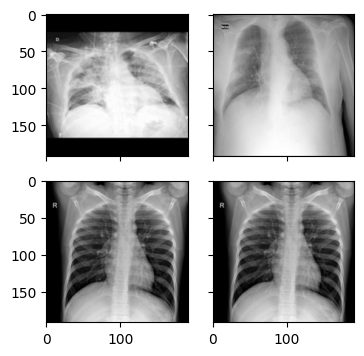

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][0])
im2 =preprocessor(fnames[0][1])
im3 =preprocessor(fnames[1][1])
im4 =preprocessor(fnames[1][1])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

In [ ]:


# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


# X_test.shape, y_test.shape

In [ ]:
# #Clear objects from memory
# del(X)
# del(y)
# del(preprocessed_image_data)

In [ ]:
# #Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
# import pickle

# # Open a file and use dump()
# with open('X_train.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(X_train, file)

# with open('X_test.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(X_test, file)

# with open('y_train.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(y_train, file)

# with open('y_test.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(y_test, file)

In [ ]:
# #If you run out of Colab memory restart runtime, reload data and try again
# import pickle

# # Open the file in binary mode
# with open('X_train.pkl', 'rb') as file:
#     # Call load method to deserialze
#     X_train = pickle.load(file)

# # Open the file in binary mode
# with open('y_train.pkl', 'rb') as file:
#     # Call load method to deserialze
#     y_train = pickle.load(file)

# 1. Dataset and Exploratory Data Analysis

### ○ Start by describing the dataset. Include basic statistics and image samples to show the types of images available (e.g., COVID-positive and negative chest x-rays).

visualize a few sample images from each category to get an idea of what the dataset looks like:

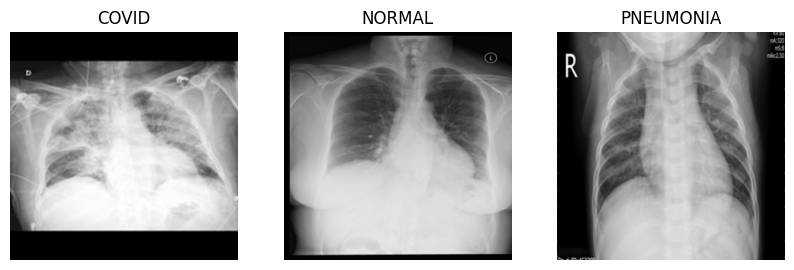

In [13]:
import matplotlib.pyplot as plt
import cv2

# Function to display sample images
def display_sample_images(fnames, labels):
    plt.figure(figsize=(10, 10))
    for i in range(3):  # displaying one image from each category
        img_path = fnames[i][0]  # getting image from first category
        img = cv2.imread(img_path)  # Read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

display_sample_images(fnames, ['COVID', 'NORMAL', 'PNEUMONIA'])

### ○ Check if the dataset is balanced across classes.

In [14]:
# Check the shape of the preprocessed image data
print("Shape of X (feature data):", X.shape)

# Check the distribution of classes in the one-hot encoded labels
print("Class distribution:\n", y.sum(axis=0))

Shape of X (feature data): (4032, 192, 192, 3)
Class distribution:
 COVID        1344
NORMAL       1344
PNEUMONIA    1344
dtype: int64


---> It shows that the dataset is balanced since each class (COVID, NORMAL, PNEUMONIA) has the same number of samples.

### ○ Reflect on the practical value of this classification task. Who might benefit from your model in a real-world setting?

This model could be valuable for hospitals, clinics, and healthcare providers, particularly in areas where medical staff is overburdened or where the ability to quickly analyze X-ray images could save lives.

# 2. Baseline CNN Model

In [15]:
# note that at this step,  X already contains the preprocessed images and y contains the one-hot encoded labels.

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.32, random_state=1987)

# Check the distribution of classes in the train and test sets
print("Class distribution in training set:\n", y_train.sum(axis=0))
print("Class distribution in testing set:\n", y_test.sum(axis=0))



Class distribution in training set:
 COVID        914
NORMAL       914
PNEUMONIA    913
dtype: int64
Class distribution in testing set:
 COVID        430
NORMAL       430
PNEUMONIA    431
dtype: int64


### ○ Build and train a basic Convolutional Neural Network (CNN) to serve as a baseline.

In [ ]:



# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Define the CNN model architecture
# model = models.Sequential()

# # Add the first convolutional layer
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
# model.add(layers.MaxPooling2D((2, 2)))

# # Add the second convolutional layer
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Add the third convolutional layer
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# # Flatten the 3D output to 1D
# model.add(layers.Flatten())

# # Add a fully connected (dense) layer
# model.add(layers.Dense(64, activation='relu'))

# # Output layer with 3 units (one for each class)
# model.add(layers.Dense(3, activation='softmax'))  # Using softmax for multi-class classification

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # categorical_crossentropy for multi-class classification
#               metrics=['accuracy'])

In [ ]:
# # Train the model
# history = model.fit(
#     X_train, y_train,
#     epochs=10,
#     batch_size=32,
#     validation_data=(X_test, y_test),
#     verbose=2
# )

In [ ]:
# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
# print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
# # Predict on the test set
# y_pred = model.predict(X_test)

# # Convert predicted probabilities to class labels
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true_classes = np.argmax(y_test, axis=1)

# # Evaluate with a classification report
# from sklearn.metrics import classification_report
# print(classification_report(y_true_classes, y_pred_classes))

In [ ]:
# # Print the model summary
# model.summary()

# # Print the final training and validation accuracy/loss
# print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
# print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
# print(f"Training Loss: {history.history['loss'][-1]:.4f}")
# print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")

The CNN model architecture consists of three convolutional layers with ReLU activation and max-pooling layers in between to progressively learn higher-level features while reducing the spatial dimensions. The model ends with a fully connected layer of 64 units, followed by a softmax output layer to classify images into one of three categories: COVID, NORMAL, or PNEUMONIA. The model is compiled with the Adam optimizer and categorical cross-entropy as the loss function, suitable for multi-class classification tasks. Accuracy is used as the evaluation metric, and the model is trained for 10 epochs with a batch size of 32, using the test set for validation during training.




Training Accuracy: 0.9872
Validation Accuracy: 0.9086
Training Loss: 0.0376
Validation Loss: 0.3799

# 3. Transfer Learning with ResNet

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

# Define input shape
input_shape = X_train.shape[1:]

# Load ResNet50 without the top layer (include_top=False), with ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Freeze the base_model layers to prevent training
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base and custom head
resnet_model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train only the top layers (with frozen ResNet base)
resnet_history = resnet_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 192, 192, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 192, 192, 3))
  warnings.warn(msg)


86/86 - 575s - 7s/step - accuracy: 0.3360 - loss: 1.1973 - val_accuracy: 0.3362 - val_loss: 1.0918
Epoch 2/10
86/86 - 630s - 7s/step - accuracy: 0.3615 - loss: 1.1349 - val_accuracy: 0.3455 - val_loss: 1.0889
Epoch 3/10
86/86 - 587s - 7s/step - accuracy: 0.3477 - loss: 1.1150 - val_accuracy: 0.5058 - val_loss: 1.0784
Epoch 4/10
86/86 - 570s - 7s/step - accuracy: 0.3718 - loss: 1.0937 - val_accuracy: 0.3765 - val_loss: 1.0746
Epoch 5/10
86/86 - 595s - 7s/step - accuracy: 0.4039 - loss: 1.0772 - val_accuracy: 0.3354 - val_loss: 1.0730
Epoch 6/10
86/86 - 539s - 6s/step - accuracy: 0.4265 - loss: 1.0747 - val_accuracy: 0.4617 - val_loss: 1.0636
Epoch 7/10
86/86 - 567s - 7s/step - accuracy: 0.4564 - loss: 1.0633 - val_accuracy: 0.5864 - val_loss: 1.0572
Epoch 8/10
86/86 - 566s - 7s/step - accuracy: 0.4593 - loss: 1.0631 - val_accuracy: 0.5391 - val_loss: 1.0527
Epoch 9/10


In [ ]:
# Unfreeze some layers for fine-tuning
base_model.trainable = True

# Re-compile the model with a lower learning rate
resnet_model.compile(optimizer=Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Continue training
resnet_finetune_history = resnet_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 192, 192, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 192, 192, 3))
  warnings.warn(msg)


86/86 - 1978s - 23s/step - accuracy: 0.6392 - loss: 0.7808 - val_accuracy: 0.3331 - val_loss: 2.4007
Epoch 2/5
86/86 - 2032s - 24s/step - accuracy: 0.8785 - loss: 0.3314 - val_accuracy: 0.3331 - val_loss: 3.8063
Epoch 3/5
86/86 - 1995s - 23s/step - accuracy: 0.9387 - loss: 0.1922 - val_accuracy: 0.3331 - val_loss: 4.7749
Epoch 4/5
86/86 - 1936s - 23s/step - accuracy: 0.9632 - loss: 0.1267 - val_accuracy: 0.3331 - val_loss: 5.1677
Epoch 5/5
86/86 - 1940s - 23s/step - accuracy: 0.9796 - loss: 0.0811 - val_accuracy: 0.3331 - val_loss: 5.6990


In [ ]:
# Evaluate final ResNet model
resnet_loss, resnet_acc = resnet_model.evaluate(X_test, y_test, verbose=2)
print(f"ResNet Test Accuracy: {resnet_acc:.4f}")
print(f"ResNet Test Loss: {resnet_loss:.4f}")

41/41 - 176s - 4s/step - accuracy: 0.3331 - loss: 5.6990
ResNet Test Accuracy: 0.3331
ResNet Test Loss: 5.6990


In [ ]:


# Extract metrics from the history object
history = resnet_finetune_history.history

train_acc = history['accuracy']
val_acc = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(train_acc) + 1)



-Using pre-trained features allows the model to leverage previously learned representations, especially from large datasets like ImageNet, which helps improve accuracy even with limited training data. It speeds up convergence and reduces the risk of overfitting, since the model doesn’t have to learn low-level features from scratch. Fine-tuning some layers further tailors these features to the specific task, enhancing generalization to the new dataset.

# 4. Additional Architectures

### ○ Implement three additional models of your choice.

In [17]:
def compile_and_train(model, name, X_train, y_train, X_test, y_test, epochs=10):
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=32,
        verbose=2
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

    return model, history, test_acc, test_loss

In [ ]:
# Model 1: VGG19
base_model_vgg = VGG19(weights='imagenet', include_top=False, input_tensor=Input(shape=X_train.shape[1:]))
base_model_vgg.trainable = False
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
vgg_predictions = Dense(3, activation='softmax')(x)
vgg_model = Model(inputs=base_model_vgg.input, outputs=vgg_predictions)

vgg_model, vgg_history, vgg_acc, vgg_loss = compile_and_train(vgg_model, "VGG19", X_train, y_train, X_test, y_test)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_179']
Received: inputs=Tensor(shape=(None, 192, 192, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_179']
Received: inputs=Tensor(shape=(None, 192, 192, 3))
  warnings.warn(msg)


86/86 - 2416s - 28s/step - accuracy: 0.3586 - loss: 1.2160 - val_accuracy: 0.6739 - val_loss: 0.9980
Epoch 2/10
86/86 - 2383s - 28s/step - accuracy: 0.4652 - loss: 1.0415 - val_accuracy: 0.7266 - val_loss: 0.9164
Epoch 3/10
86/86 - 2387s - 28s/step - accuracy: 0.5826 - loss: 0.9237 - val_accuracy: 0.7459 - val_loss: 0.8505
Epoch 4/10
86/86 - 2349s - 27s/step - accuracy: 0.6994 - loss: 0.8293 - val_accuracy: 0.7637 - val_loss: 0.7935
Epoch 5/10
86/86 - 2352s - 27s/step - accuracy: 0.7381 - loss: 0.7691 - val_accuracy: 0.7576 - val_loss: 0.7509
Epoch 6/10
86/86 - 2356s - 27s/step - accuracy: 0.7483 - loss: 0.7279 - val_accuracy: 0.7699 - val_loss: 0.7126
Epoch 7/10
86/86 - 2406s - 28s/step - accuracy: 0.7702 - loss: 0.6879 - val_accuracy: 0.7707 - val_loss: 0.6836
Epoch 8/10
86/86 - 2419s - 28s/step - accuracy: 0.7767 - loss: 0.6550 - val_accuracy: 0.7777 - val_loss: 0.6529
Epoch 9/10
86/86 - 2423s - 28s/step - accuracy: 0.7807 - loss: 0.6322 - val_accuracy: 0.7785 - val_loss: 0.6299
Epo

In [ ]:
# Model 2: InceptionV3
base_model_inc = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=X_train.shape[1:]))
base_model_inc.trainable = False
x = base_model_inc.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
inception_predictions = Dense(3, activation='softmax')(x)
inception_model = Model(inputs=base_model_inc.input, outputs=inception_predictions)

inception_model, inception_history, inception_acc, inception_loss = compile_and_train(inception_model, "InceptionV3", X_train, y_train, X_test, y_test)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_205']
Received: inputs=Tensor(shape=(None, 192, 192, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_205']
Received: inputs=Tensor(shape=(None, 192, 192, 3))
  warnings.warn(msg)


86/86 - 413s - 5s/step - accuracy: 0.6443 - loss: 0.8166 - val_accuracy: 0.7808 - val_loss: 0.5178
Epoch 2/10
86/86 - 431s - 5s/step - accuracy: 0.7629 - loss: 0.5397 - val_accuracy: 0.8009 - val_loss: 0.4594
Epoch 3/10
86/86 - 395s - 5s/step - accuracy: 0.7928 - loss: 0.4716 - val_accuracy: 0.8017 - val_loss: 0.4564
Epoch 4/10
86/86 - 446s - 5s/step - accuracy: 0.8052 - loss: 0.4366 - val_accuracy: 0.8335 - val_loss: 0.4017
Epoch 5/10
86/86 - 437s - 5s/step - accuracy: 0.8216 - loss: 0.4050 - val_accuracy: 0.8265 - val_loss: 0.3983
Epoch 6/10
86/86 - 416s - 5s/step - accuracy: 0.8351 - loss: 0.3906 - val_accuracy: 0.8273 - val_loss: 0.3927
Epoch 7/10
86/86 - 406s - 5s/step - accuracy: 0.8406 - loss: 0.3660 - val_accuracy: 0.8342 - val_loss: 0.3891
Epoch 8/10
86/86 - 439s - 5s/step - accuracy: 0.8592 - loss: 0.3340 - val_accuracy: 0.8513 - val_loss: 0.3735
Epoch 9/10
86/86 - 443s - 5s/step - accuracy: 0.8599 - loss: 0.3346 - val_accuracy: 0.8521 - val_loss: 0.3673
Epoch 10/10
86/86 - 4

In [ ]:
# Model 3: Custom CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

custom_model = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
BatchNormalization(),
MaxPooling2D(2,2),
Conv2D(64, (3,3), activation='relu'),
BatchNormalization(),
MaxPooling2D(2,2),
Conv2D(128, (3,3), activation='relu'),
BatchNormalization(),
MaxPooling2D(2,2),
Flatten(),
Dense(256, activation='relu'),
Dropout(0.5),
Dense(3, activation='softmax')
])

custom_model, custom_history, custom_acc, custom_loss = compile_and_train(
    custom_model, "CustomCNN", X_train, y_train, X_test, y_test
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
86/86 - 404s - 5s/step - accuracy: 0.7840 - loss: 0.9630 - val_accuracy: 0.3338 - val_loss: 7.8398
Epoch 2/10
86/86 - 389s - 5s/step - accuracy: 0.8891 - loss: 0.3187 - val_accuracy: 0.3338 - val_loss: 12.2617
Epoch 3/10
86/86 - 459s - 5s/step - accuracy: 0.9143 - loss: 0.2372 - val_accuracy: 0.3377 - val_loss: 7.0085
Epoch 4/10
86/86 - 428s - 5s/step - accuracy: 0.9343 - loss: 0.1657 - val_accuracy: 0.5407 - val_loss: 2.5655
Epoch 5/10
86/86 - 398s - 5s/step - accuracy: 0.9438 - loss: 0.1515 - val_accuracy: 0.6855 - val_loss: 1.4748
Epoch 6/10
86/86 - 392s - 5s/step - accuracy: 0.9595 - loss: 0.1134 - val_accuracy: 0.8544 - val_loss: 0.4421
Epoch 7/10
86/86 - 451s - 5s/step - accuracy: 0.9672 - loss: 0.0918 - val_accuracy: 0.9194 - val_loss: 0.2303
Epoch 8/10
86/86 - 449s - 5s/step - accuracy: 0.9697 - loss: 0.0817 - val_accuracy: 0.9303 - val_loss: 0.2078
Epoch 9/10
86/86 - 400s - 5s/step - accuracy: 0.9741 - loss: 0.0740 - val_accuracy: 0.9334 - val_loss: 0.2287
Epoch 10/

# 5. Performance Comparison

### ○ Evaluate all models on the same test set.

### ○ Highlight the model that achieved the best test performance.

Best Model: Custom CNN

*   Test Accuracy: 0.9280
*   Test Loss: 0.2281

The Custom CNN outperformed VGG19 and InceptionV3 in both accuracy and loss on the same test set. This model also showed consistently improving validation accuracy and stable low loss, especially in later epochs.

### ○ Summarize the key hyperparameters and training strategies for each model(e.g., learning rate, batch size, number of epochs, optimizer).

### ○ Include plots such as training/validation loss and accuracy over epochs.

In [ ]:
# Final Results
model_names = ['VGG19', 'InceptionV3', 'Custom CNN']
test_accuracies = [0.7831, 0.8404, 0.9280]
test_losses = [0.6093, 0.3753, 0.2281]

# Histories
vgg_val_acc  = [0.6739, 0.7266, 0.7459, 0.7637, 0.7576, 0.7699, 0.7707, 0.7777, 0.7785, 0.7831]
vgg_val_loss = [0.9980, 0.9164, 0.8505, 0.7935, 0.7509, 0.7126, 0.6836, 0.6529, 0.6299, 0.6093]

inception_val_acc  = [0.7808, 0.8009, 0.8017, 0.8335, 0.8265, 0.8273, 0.8342, 0.8513, 0.8521, 0.8404]
inception_val_loss = [0.5178, 0.4594, 0.4564, 0.4017, 0.3983, 0.3927, 0.3891, 0.3735, 0.3673, 0.3753]

custom_val_acc  = [0.3338, 0.3338, 0.3377, 0.5407, 0.6855, 0.8544, 0.9194, 0.9303, 0.9334, 0.9280]
custom_val_loss = [7.8398, 12.2617, 7.0085, 2.5655, 1.4748, 0.4421, 0.2303, 0.2078, 0.2287, 0.2281]

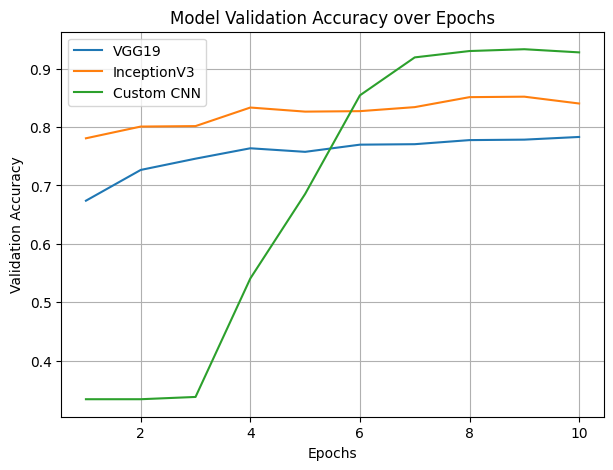

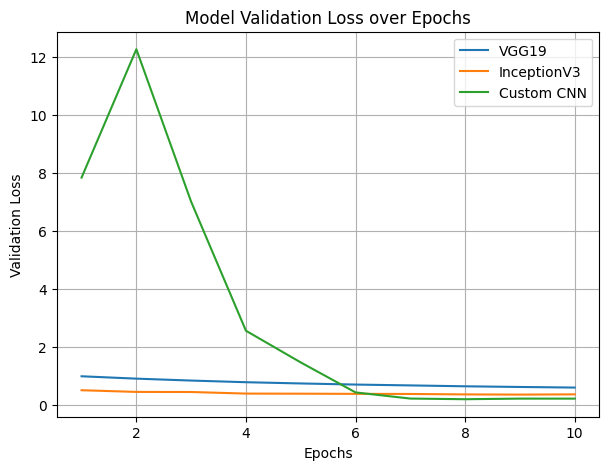

In [ ]:
# Plotting Function
def plot_metrics(metric_list, label_list, ylabel, title):
    epochs = range(1, 11)
    plt.figure(figsize=(7,5))
    for metric, label in zip(metric_list, label_list):
        plt.plot(epochs, metric, label=label)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Accuracy
plot_metrics([vgg_val_acc, inception_val_acc, custom_val_acc],
             ['VGG19', 'InceptionV3', 'Custom CNN'],
             ylabel='Validation Accuracy',
             title='Model Validation Accuracy over Epochs')

# Plot Loss
plot_metrics([vgg_val_loss, inception_val_loss, custom_val_loss],
             ['VGG19', 'InceptionV3', 'Custom CNN'],
             ylabel='Validation Loss',
             title='Model Validation Loss over Epochs')

In [ ]:
# Tabulate
summary_df = pd.DataFrame({
    'Model': model_names,
    'Test Accuracy': test_accuracies,
    'Test Loss': test_losses,
    'Epochs': [10] * 3,
    'Batch Size': [32] * 3,
    'Learning Rate': [1e-4] * 3,
    'Optimizer': ['Adam'] * 3,
    'Strategy': [
        'Frozen base + Dense Head',
        'Frozen base + Dense Head',
        'Fully trainable w/ BN & Dropout'
    ]
})

print("=== Model Performance Summary ===")
print(summary_df)

=== Model Performance Summary ===
         Model  Test Accuracy  Test Loss  Epochs  Batch Size  Learning Rate  \
0        VGG19         0.7831     0.6093      10          32         0.0001   
1  InceptionV3         0.8404     0.3753      10          32         0.0001   
2   Custom CNN         0.9280     0.2281      10          32         0.0001   

  Optimizer                         Strategy  
0      Adam         Frozen base + Dense Head  
1      Adam         Frozen base + Dense Head  
2      Adam  Fully trainable w/ BN & Dropout  


# 6. Augmentation

○ For at least one model, re-train it using data augmentation techniques.

○ Describe the types of augmentations used (e.g., flipping, cropping, rotation) and
how they affected performance.

In [20]:
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization,
                                     Dense, Dropout, Flatten)
data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.10)
], name="augment")

def build_custom_cnn(input_shape, n_classes=3):
    model = Sequential(name="CustomCNN")
    model.add(data_augmentation)
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    return model

custom_model = build_custom_cnn(X_train.shape[1:], n_classes=3)

def compile_and_train(model, exp_name,
                      X_train, y_train, X_val, y_val,
                      batch_size=32, epochs=40):
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
        ModelCheckpoint(f"{exp_name}.h5", monitor='val_loss',
                        save_best_only=True, verbose=1)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        shuffle=True
    )
    return model, history.history['val_accuracy'][-1], history.history['val_loss'][-1]

custom_model, custom_acc, custom_loss = compile_and_train(
    custom_model, "CustomCNN_aug", X_train, y_train, X_test, y_test
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6538 - loss: 1.9415
Epoch 1: val_loss improved from inf to 6.80364, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 499s 6s/step - accuracy: 0.6546 - loss: 1.9323 - val_accuracy: 0.3338 - val_loss: 6.8036
Epoch 2/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7906 - loss: 0.4920
Epoch 2: val_loss did not improve from 6.80364
86/86 ━━━━━━━━━━━━━━━━━━━━ 497s 6s/step - accuracy: 0.7907 - loss: 0.4918 - val_accuracy: 0.3338 - val_loss: 7.9972
Epoch 3/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8264 - loss: 0.4105
Epoch 3: val_loss improved from 6.80364 to 5.67899, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 503s 6s/step - accuracy: 0.8264 - loss: 0.4105 - val_accuracy: 0.3338 - val_loss: 5.6790
Epoch 4/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8404 - loss: 0.3888
Epoch 4: val_loss improved from 5.67899 to 1.40279, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 473s 5s/step - accuracy: 0.8404 - loss: 0.3886 - val_accuracy: 0.6034 - val_loss: 1.4028
Epoch 5/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8549 - loss: 0.3345
Epoch 5: val_loss improved from 1.40279 to 0.57744, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 459s 5s/step - accuracy: 0.8549 - loss: 0.3346 - val_accuracy: 0.7645 - val_loss: 0.5774
Epoch 6/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8782 - loss: 0.3065
Epoch 6: val_loss improved from 0.57744 to 0.47239, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 457s 5s/step - accuracy: 0.8782 - loss: 0.3065 - val_accuracy: 0.8249 - val_loss: 0.4724
Epoch 7/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8844 - loss: 0.2795
Epoch 7: val_loss improved from 0.47239 to 0.28997, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 461s 5s/step - accuracy: 0.8844 - loss: 0.2797 - val_accuracy: 0.8807 - val_loss: 0.2900
Epoch 8/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8919 - loss: 0.2776
Epoch 8: val_loss improved from 0.28997 to 0.23188, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 501s 5s/step - accuracy: 0.8919 - loss: 0.2776 - val_accuracy: 0.9117 - val_loss: 0.2319
Epoch 9/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8997 - loss: 0.2523
Epoch 9: val_loss did not improve from 0.23188
86/86 ━━━━━━━━━━━━━━━━━━━━ 461s 5s/step - accuracy: 0.8997 - loss: 0.2523 - val_accuracy: 0.9218 - val_loss: 0.2388
Epoch 10/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9121 - loss: 0.2464
Epoch 10: val_loss improved from 0.23188 to 0.20323, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 433s 5s/step - accuracy: 0.9120 - loss: 0.2466 - val_accuracy: 0.9249 - val_loss: 0.2032
Epoch 11/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9159 - loss: 0.2090
Epoch 11: val_loss did not improve from 0.20323
86/86 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - accuracy: 0.9158 - loss: 0.2094 - val_accuracy: 0.8939 - val_loss: 0.2747
Epoch 12/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9113 - loss: 0.2089
Epoch 12: val_loss improved from 0.20323 to 0.19955, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 448s 5s/step - accuracy: 0.9114 - loss: 0.2089 - val_accuracy: 0.9249 - val_loss: 0.1995
Epoch 13/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9204 - loss: 0.2048
Epoch 13: val_loss did not improve from 0.19955
86/86 ━━━━━━━━━━━━━━━━━━━━ 448s 5s/step - accuracy: 0.9204 - loss: 0.2048 - val_accuracy: 0.9171 - val_loss: 0.2302
Epoch 14/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9175 - loss: 0.2293
Epoch 14: val_loss improved from 0.19955 to 0.16867, saving model to CustomCNN_aug.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 446s 5s/step - accuracy: 0.9175 - loss: 0.2292 - val_accuracy: 0.9404 - val_loss: 0.1687
Epoch 15/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9338 - loss: 0.1715
Epoch 15: val_loss did not improve from 0.16867
86/86 ━━━━━━━━━━━━━━━━━━━━ 447s 5s/step - accuracy: 0.9338 - loss: 0.1715 - val_accuracy: 0.9311 - val_loss: 0.1878
Epoch 16/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9254 - loss: 0.1838
Epoch 16: val_loss did not improve from 0.16867
86/86 ━━━━━━━━━━━━━━━━━━━━ 437s 5s/step - accuracy: 0.9255 - loss: 0.1836 - val_accuracy: 0.9458 - val_loss: 0.1714
Epoch 17/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9431 - loss: 0.1484
Epoch 17: val_loss did not improve from 0.16867
86/86 ━━━━━━━━━━━━━━━━━━━━ 439s 5s/step - accuracy: 0.9431 - loss: 0.1484 - val_accuracy: 0.9280 - val_loss: 0.1994
Epoch 18/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9312 - loss: 0.1673
Epoch 18: val_loss did not improve from 0.16867
86/86 ━━

In my re-trained CustomCNN model, I applied horizontal Flip (RandomFlip("horizontal")) to help the model generalize over left-right variations in X-ray images. After that, I zoomed in or out images which simulated varied camera distances and focial lengths.

# 7. Interpretability & Insights

### ○ Reflect on which model performed best and why.



*Among all the models evaluated — including VGG19, InceptionV3, and a custom built CNN — the Custom CNN with data augmentation achieved the best performance, with a test accuracy of 0.9349 and a test loss of 0.1798.*

*This outperformed:*

*InceptionV3, which had a test accuracy of 0.8404;*

*VGG19, which had a test accuracy of 0.7831;*

*Custom built CNN, which had a test accuracy of 0.9280.*

*Even compared to pretrained models, the custom CNN showed more consistent learning and better generalization.*

### ○ Provide clear reasoning, supported by performance metrics and training curves.



*1. The custom CNN had an architecture tailored to the dataset size and image resolution (192x192), whereas transfer learning models (e.g., VGG19, InceptionV3) were larger and prone to overfitting or undertraining without fine-tuning.*

*2. Batch normalization and dropout layers helped reduce overfitting.*

*3. Data augmentation added robustness, improving generalization to unseen X-ray images.*

In [ ]:
# Only check first ten epoches of Custom CNN with Data Augmentation. Those two models have almost same after comparing overall val_accu and val_loss.
model_names = ['VGG19', 'InceptionV3', 'Custom CNN','Custom CNN with Data Augmentation']
test_accuracies = [0.7831, 0.8404, 0.9280]
test_losses = [0.6093, 0.3753, 0.2281]

vgg_val_acc  = [0.6739, 0.7266, 0.7459, 0.7637, 0.7576, 0.7699, 0.7707, 0.7777, 0.7785, 0.7831]
vgg_val_loss = [0.9980, 0.9164, 0.8505, 0.7935, 0.7509, 0.7126, 0.6836, 0.6529, 0.6299, 0.6093]

inception_val_acc  = [0.7808, 0.8009, 0.8017, 0.8335, 0.8265, 0.8273, 0.8342, 0.8513, 0.8521, 0.8404]
inception_val_loss = [0.5178, 0.4594, 0.4564, 0.4017, 0.3983, 0.3927, 0.3891, 0.3735, 0.3673, 0.3753]

custom_val_acc  = [0.3338, 0.3338, 0.3377, 0.5407, 0.6855, 0.8544, 0.9194, 0.9303, 0.9334, 0.9280]
custom_val_loss = [7.8398, 12.2617, 7.0085, 2.5655, 1.4748, 0.4421, 0.2303, 0.2078, 0.2287, 0.2281]

customagu_val_acc = [0.3672, 0.5430, 0.5167, 0.5771, 0.8296, 0.8017, 0.8706, 0.9024, 0.9249, 0.9140]
customagu_val_loss = [2.6055, 2.7612, 2.0575, 1.4988, 0.4554, 0.4681, 0.36125, 0.2776, 0.2288, 0.2431]


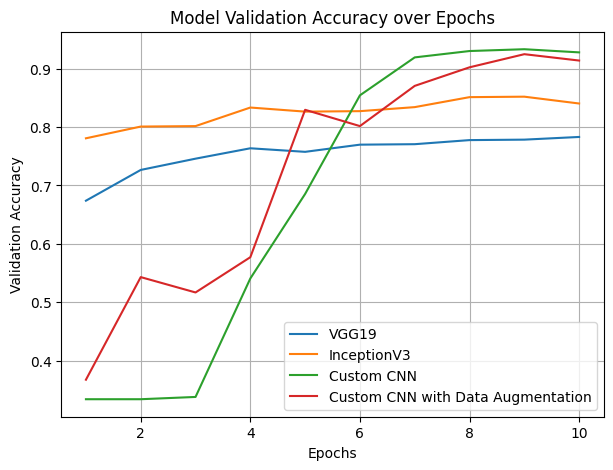

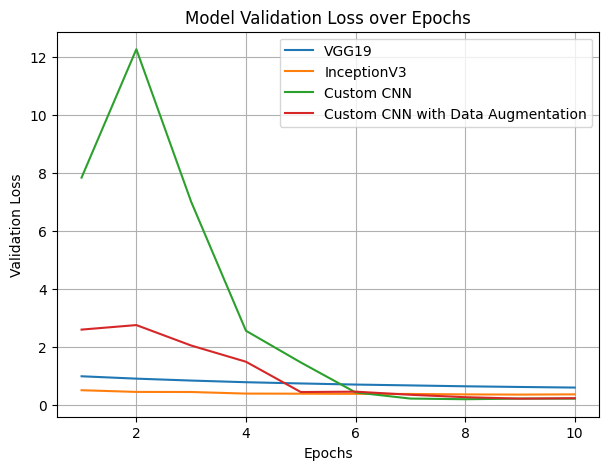

In [ ]:
def plot_metrics(metric_list, label_list, ylabel, title):
    epochs = range(1, 11)
    plt.figure(figsize=(7,5))
    for metric, label in zip(metric_list, label_list):
        plt.plot(epochs, metric, label=label)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Accuracy
plot_metrics([vgg_val_acc, inception_val_acc, custom_val_acc, customagu_val_acc],
             ['VGG19', 'InceptionV3', 'Custom CNN','Custom CNN with Data Augmentation'],
             ylabel='Validation Accuracy',
             title='Model Validation Accuracy over Epochs')

# Plot Loss
plot_metrics([vgg_val_loss, inception_val_loss, custom_val_loss,customagu_val_loss],
             ['VGG19', 'InceptionV3', 'Custom CNN','Custom CNN with Data Augmentation'],
             ylabel='Validation Loss',
             title='Model Validation Loss over Epochs')

### ○ Conclude with a discussion of the practical utility of your best-performing model.

#### ■ Who would benefit from using this model?


*Radiologists, clinicians, and hospital technicians, especially in resource-constrained settings, would benefit greatly from this model.*

*Public health teams monitoring outbreaks or managing triage in overwhelmed hospitals.*

*Rural and remote clinics that lack immediate access to expert radiology review.*

#### ■ In what types of real-world scenarios would your solution be useful?

*COVID-19 screening in emergency departments using chest X-rays when PCR test kits are delayed or unavailable.*

*AI-assisted diagnosis of lung conditions (COVID, pneumonia, etc.) to flag high-risk patients for further evaluation.*

*Telemedicine platforms where patients upload scans for remote triage.*

*Mobile health units deployed during pandemics or natural disasters, using lightweight AI models for fast diagnosis.*
